In [3]:
import time
import requests
import urllib.request
import pyperclip
from prettytable import PrettyTable

from bs4 import BeautifulSoup as bs
from IPython.display import Javascript, display
from IPython.display import Image

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [4]:
def clipboard_input(tag_name, user_input, driver):
        temp_user_input = pyperclip.paste()  # 사용자 클립보드를 따로 저장
        pyperclip.copy(user_input)
        driver.find_element(By.NAME, tag_name).click()
        ActionChains(driver).key_down(Keys.CONTROL).send_keys('v').key_up(Keys.CONTROL).perform()
        pyperclip.copy(temp_user_input)  # 사용자 클립보드에 저장 된 내용을 다시 가져 옴
        time.sleep(0.5)

In [5]:
def source_init(src):
    with open('run_next_cell_patch.js') as f:
        # Monkey patch Jupyter with
        # set_next_input(run=True) functionality
        display(Javascript(f.read()))

    from IPython import get_ipython
    ip = get_ipython()
    ip.payload_manager.write_payload(
            dict(
                source='set_next_input',
                text=src,
                replace=False,
                execute=True
            )
    )

In [12]:
def get_session_from_site(driver):
    headers = {
            "User-Agent":
                "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"
        }
    ss = requests.session()
    ss.headers.update(headers)

    for cookie in driver.get_cookies():
        c = {cookie['name']: cookie['value']}
        ss.cookies.update(c)
    return ss

In [6]:
def getProblemText(res_data, language):
    print(res_data.json()['data']['question']['title'])
    
    for item in res_data.json()['data']['question']['topicTags']:
        print(item['name'], end=', ')
        
    print('')
    bs_html = bs(res_data.json()['data']['question']['content'], "html.parser")
    for line in bs_html:
        line_text = line.get_text().strip()
        if line_text != '':
            if 'Example' in line_text:
                print('')
            print(line_text)
    
    # making srouce code
    src = '%%writefile '+ res_data.json()['data']['question']['titleSlug'] +'.py\n'
    src = src + '# 소스코드를 작성하는 공간입니다. 코딩을 하기 위해서는 writefile 라인을 주석처리해주세요\n'
    for item in res.json()['data']['question']['codeSnippets']:
        if item['lang'] == language:
            src = src + item['code']+'\n'
            #print(item['code'])
    source_init(src)

In [ ]:
#https://leetcode.com/problems/longest-substring-without-repeating-characters/
#https://leetcode.com/problemset/algorithms/?page=7&difficulty=MEDIUM&status=NOT_STARTED

In [ ]:
def 문제리스트가져오기(호출주소, 세션):
    res = 세션.get(호출주소)
    return res

In [4]:
def 문제불러오기(문제번호):
    #https://www.acmicpc.net/problem/14681

In [9]:
options = Options()
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("--window-size=1,1")
options.add_argument("--window-position=500,500")
options.add_experimental_option('excludeSwitches', ['enable-logging'])
driver = webdriver.Chrome('./chromedriver.exe', chrome_options=options)
#driver.set_window_position(500, 100, windowHandle='current')
driver.implicitly_wait(5)
driver.get('https://www.acmicpc.net/login?next=/')
time.sleep(0.5)
clipboard_input('login_user_id', 'sjseo85', driver)
clipboard_input('login_password', 'tjtjdwls2!', driver)
driver.find_element(By.ID,'submit_button').click()

C:\Users\User\AppData\Local\Temp\ipykernel_5540\2857428031.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe', chrome_options=options)
C:\Users\User\AppData\Local\Temp\ipykernel_5540\2857428031.py:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('./chromedriver.exe', chrome_options=options)


In [13]:
boj_session = get_session_from_site(driver)

In [ ]:
#https://solved.ac/problems/level/10 레벨단위로 가져오기

In [178]:
#https://solved.ac/api/v3/search/problem?query=solvable:true+tier:10&page=1
json_data = {
    "query":"solvable:true tier:10",
    "page":"1",
}
res = requests.get("https://solved.ac/api/v3/search/problem",json_data)

In [187]:
res.json()

for item in res.json()['items']:
    pass
    #print(item['problemId'])
    #print(item['titleKo'])

In [202]:
for item in res.json()['items']:
    #print(item['problemId'])
    #print(item['titleKo'])
    for in_item in item['tags'][0]:
        print(in_item)
    #for in_item in item['tags']:
        #print(in_item['displayNames'][0]['short'])
    print('heeeee')

key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames
heeeee
key
isMeta
bojTagId
problemCount
displayNames


In [166]:
table = PrettyTable()
table.title = '알고리즘별'
table.field_names = ['링크_1','한글_1','링크_2','한글_2', '링크_3', '한글_3'] 
add_item = []
for item in bs_html.find('tbody').find_all('td'):
    print(item)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
# 전체문제 1depth
#https://www.acmicpc.net/problemset/
# 단계별 문제 2depth
#https://www.acmicpc.net/step
#https://www.acmicpc.net/step/8
# 알고리즘 분류 2depth
#https://www.acmicpc.net/problem/tags
#https://www.acmicpc.net/problemset?sort=ac_desc&algo=100

In [14]:
res = boj_session.get('https://www.acmicpc.net/problem/1004')
bs_html = bs(res.text,  "html.parser")

문제:
어린 왕자는 소혹성 B-664에서 자신이 사랑하는 한 송이 장미를 위해 살아간다. 어느 날 장미가 위험에 빠지게 된 것을 알게 된 어린 왕자는, 장미를 구하기 위해 은하수를 따라 긴 여행을 하기 시작했다. 하지만 어린 왕자의 우주선은 그렇게 좋지 않아서 행성계 간의 이동을 최대한 피해서 여행해야 한다. 아래의 그림은 어린 왕자가 펼쳐본 은하수 지도의 일부이다.:빨간 실선은 어린 왕자가 출발점에서 도착점까지 도달하는데 있어서 필요한 행성계 진입/이탈 횟수를 최소화하는 경로이며, 원은 행성계의 경계를 의미한다. 이러한 경로는 여러 개 존재할 수 있지만 적어도 3번의 행성계 진입/이탈이 필요하다는 것을 알 수 있다.
위와 같은 은하수 지도, 출발점, 도착점이 주어졌을 때 어린 왕자에게 필요한 최소의 행성계 진입/이탈 횟수를 구하는 프로그램을 작성해 보자. 행성계의 경계가 맞닿거나 서로 교차하는 경우는 없다. 또한, 출발점이나 도착점이 행성계 경계에 걸쳐진 경우 역시 입력으로 주어지지 않는다.
1

입력:
입력의 첫 줄에는 테스트 케이스의 개수 T가 주어진다. 그 다음 줄부터 각각의 테스트케이스에 대해 첫째 줄에 출발점 (x1, y1)과 도착점 (x2, y2)이 주어진다. 두 번째 줄에는 행성계의 개수 n이 주어지며, 세 번째 줄부터 n줄에 걸쳐 행성계의 중점과 반지름 (cx, cy, r)이 주어진다.

출력:
각 테스트 케이스에 대해 어린 왕자가 거쳐야 할 최소의 행성계 진입/이탈 횟수를 출력한다.

제한::-1000 ≤ x1, y1, x2, y2, cx, cy ≤ 1000
1 ≤ r ≤ 1000
1 ≤ n ≤ 50
좌표와 반지름은 모두 정수

힌트



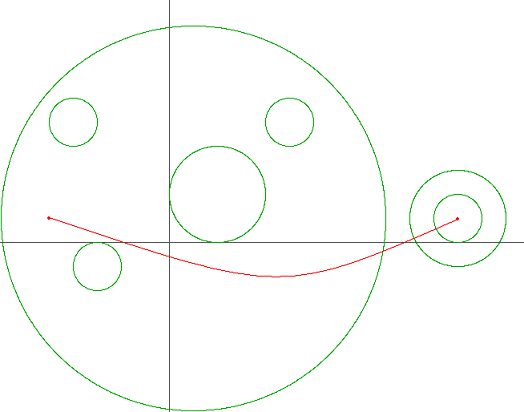

+-------------------------------------------------------+
|                        예제입력                       |
+------------+------------+----------------+------------+
| 예제입력_1 | 예제출력_1 | 예제입력_2     | 예제출력_2 |
+------------+------------+----------------+------------+
| 2          | 3          | 3              | 2          |
| -5 1 12 1  | 0          | -5 1 5 1       | 5          |
| 7          |            | 3              | 3          |
| 1 1 8      |            | 0 0 2          |            |
| -3 -1 1    |            | -6 1 2         |            |
| 2 2 2      |            | 6 2 2          |            |
| 5 5 1      |            | 2 3 13 2       |            |
| -4 5 1     |            | 8              |            |
| 12 1 1     |            | -3 -1 1        |            |
| 12 1 2     |            | 2 2 3          |            |
| -5 1 5 1   |            | 2 3 1          |            |
| 1          |            | 0 1 7          |            |
| 0 0 2      |            | -4 5 1

In [160]:
for item in bs_html.find_all('section', 'problem-section'):
    #print(idx, item)
    print(item.get_text().strip().replace('\n\n', ':'))
    if item.select('img'):
    print('')
    
display.display(display.Image("https://onlinejudgeimages.s3-ap-northeast-1.amazonaws.com/upload/201003/dfcmhrjj_113gw6bcng2_b.gif"))

table = PrettyTable()
table.title = '예제입력'
table.field_names = ['예제입력_1','예제출력_1','예제입력_2','예제출력_2'] 
table.align['예제입력_1'] = "l"
table.align['예제출력_1'] = "l"
table.align['예제입력_2'] = "l"
table.align['예제출력_2'] = "l"
add_item = []
for item in bs_html.find_all('pre', class_='sampledata'):
    add_item.append(item.get_text().strip())
    
table.add_row(add_item)
print(table)

In [ ]:
idx = 0
for item in bs_html.find('div', id='problem-body'):
    if item.find('div') != -1:
        print(idx, item.find('div'))
    #if item.find('div').get_int() > 0:
        #item.find('div').get_text()
    #print(item.find('div'))
    #print(idx, item)
    #print(item.find_all('h2'))
    #print(item.find('p'))

In [8]:
res = boj_session.get('https://www.acmicpc.net/problem/tags')
bs_html = bs(res.text,  "html.parser")

In [20]:
table = PrettyTable()
table.title = '알고리즘별'
table.field_names = ['링크_1','한글_1','링크_2','한글_2', '링크_3', '한글_3'] 
add_item = []
for item in bs_html.find('tbody').find_all('td'):
    if item.find('a') != None:
        if len(add_item) == 6:
            table.add_row(add_item)
            add_item = []
        if item.select('a')[0]['href'] in add_item :
            continue
        add_item.append(item.select('a')[0]['href'].strip()[:20])
        add_item.append(item.find('a').get_text().strip()[:10])
print(table)

+-----------------------------------------------------------------------------------------------------------------------------+
|                                                          알고리즘별                                                         |
+------------------+----------------+----------------------+---------------------+----------------------+---------------------+
|      링크_1      |     한글_1     |        링크_2        |        한글_2       |        링크_3        |        한글_3       |
+------------------+----------------+----------------------+---------------------+----------------------+---------------------+
| /problem/tag/124 |      수학      |   /problem/tag/102   |         구현        |   /problem/tag/25    | 다이나믹 프로그래밍 |
| /problem/tag/25  |   Dynamic Pr   |   /problem/tag/175   |      자료 구조      |    /problem/tag/7    |     그래프 이론     |
|  /problem/tag/7  |   Graph Theo   |   /problem/tag/158   |        문자열       |   /problem/tag/33    |   그리디 알고리즘   |
| /problem/tag/33  |     

In [78]:
res = boj_session.get('https://www.acmicpc.net/step/1')
bs_html = bs(res.text,  "html.parser")

In [93]:
table = PrettyTable()
table.title = '문제풀이'
table.field_names = ['문제번호_1', '문제명_1','문제번호_2', '문제명_2','문제번호_3', '문제명_3'] 
add_item = []
for item in bs_html.find('tbody').find_all('tr'):
    try:
        if len(add_item) == 4 :
            add_item.append(item.find('td', class_='list_problem_id').get_text())
            add_item.append(item.find('a').get_text())
            table.add_row(add_item)
            add_item = []
        else:
            add_item.append(item.find('td', class_='list_problem_id').get_text())
            add_item.append(item.find('a').get_text())
    except:
        continue
if len(add_item) > 0:
    while True:
        if(len(add_item) == 6):
            table.add_row(add_item)
            break
        add_item.append('')
print(table)

+---------------------------------------------------------------------------------------------------------------------------+
|                                                          문제풀이                                                         |
+------------+-------------+------------+---------------------------------------+------------+------------------------------+
| 문제번호_1 |   문제명_1  | 문제번호_2 |                문제명_2               | 문제번호_3 |           문제명_3           |
+------------+-------------+------------+---------------------------------------+------------+------------------------------+
|    2557    | Hello World |    1000    |                  A+B                  |    1001    |             A-B              |
|   10998    |     A×B     |    1008    |                  A/B                  |   10869    |           사칙연산           |
|   10926    |     ??!     |   18108    | 1998년생인 내가 태국에서는 2541년생?! |    3003    | 킹, 퀸, 룩, 비숍, 나이트, 폰 |
|   10430    |    나머지   |    2588    |    

In [57]:
res = boj_session.get('https://www.acmicpc.net/step')

In [58]:
bs_html = bs(res.text,  "html.parser")

In [91]:
table = PrettyTable()
table.title = '단계별풀이'
table.field_names = ['단계', '제목','설명', '정보', '총문제','해결'] 
add_item = []
for item in bs_html.find('tbody').find_all('td'):
    if len(add_item) == 5:
        add_item.append(item.get_text())
        table.add_row(add_item)
        add_item = []
    else:
        add_item.append(item.get_text()[:20])
print(table)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                 단계별풀이                                                                                                |
+------------------------------+------------------------------------+-------------+-------------------------------------+--------------------------------+--------------------------------------------------+
|             단계             |                제목                |     설명    |                 정보                |             총문제             |                       해결                       |
+------------------------------+------------------------------------+-------------+-------------------------------------+--------------------------------+----------------------------------------

In [27]:
res = boj_session.get('https://www.acmicpc.net/problemset/1')

In [56]:
bs_html = bs(res.text,  "html.parser")
table = PrettyTable()
table.title = '문제풀이'
table.field_names = ['문제번호_1', '문제명_1','문제번호_2', '문제명_2','문제번호_3', '문제명_3'] 
add_item = []
for item in bs_html.find('tbody').find_all('tr'):
    if len(add_item) == 4 :
        add_item.append(item.find('td', class_='list_problem_id').get_text())
        add_item.append(item.find('a').get_text())
        table.add_row(add_item)
        add_item = []
    else:
        add_item.append(item.find('td', class_='list_problem_id').get_text())
        add_item.append(item.find('a').get_text())
if len(add_item) > 0:
    while True:
        if(len(add_item) == 6):
            table.add_row(add_item)
            break
        add_item.append('')
print(table)

+---------------------------------------------------------------------------------------------------------------------+
|                                                       문제풀이                                                      |
+------------+--------------------+------------+--------------------------+------------+------------------------------+
| 문제번호_1 |      문제명_1      | 문제번호_2 |         문제명_2         | 문제번호_3 |           문제명_3           |
+------------+--------------------+------------+--------------------------+------------+------------------------------+
|    1000    |        A+B         |    1001    |           A-B            |    1002    |             터렛             |
|    1003    |   피보나치 함수    |    1004    |        어린 왕자         |    1005    |          ACM Craft           |
|    1006    |   습격자 초라기    |    1007    |        벡터 매칭         |    1008    |             A/B              |
|    1009    |      분산처리      |    1010    |        다리 놓기         |    1011    | Fly me

In [42]:
leet_session = get_session_from_site(driver)
res = leet_session.post('https://leetcode.com/graphql', json=getProblemListQueryJson('MEDIUM', 50))
question_id = res.json()['data']['problemsetQuestionList']['questions'][0]['frontendQuestionId']
file_name = res.json()['data']['problemsetQuestionList']['questions'][0]['titleSlug']
for i in range(5):
    print(res.json()['data']['problemsetQuestionList']['questions'][i]['frontendQuestionId'], end='. ')
    print(res.json()['data']['problemsetQuestionList']['questions'][i]['title'])
    print(res.json()['data']['problemsetQuestionList']['questions'][i]['titleSlug'])

3. Longest Substring Without Repeating Characters
longest-substring-without-repeating-characters
5. Longest Palindromic Substring
longest-palindromic-substring
6. Zigzag Conversion
zigzag-conversion
11. Container With Most Water
container-with-most-water
12. Integer to Roman
integer-to-roman


In [12]:
res = requests.post('https://leetcode.com/graphql', json=getProblemQueryJson('two-sum'))
driver.get('https://leetcode.com/problems/'+'two-sum'+'/')
getProblemText(res, 'Python3')

Two Sum
Array, Hash Table, 
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.
You may assume that each input would have exactly one solution, and you may not use the same element twice.
You can return the answer in any order.

Example 1:
Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].

Example 2:
Input: nums = [3,2,4], target = 6
Output: [1,2]

Example 3:
Input: nums = [3,3], target = 6
Output: [0,1]
Constraints:
2 <= nums.length <= 104
-109 <= nums[i] <= 109
-109 <= target <= 109
Only one valid answer exists.
Follow-up:
Can you come up with an algorithm that is less than
O(n2)
time complexity?


<IPython.core.display.Javascript object>

In [ ]:
%%writefile two-sum.py
# 소스코드를 작성하는 공간입니다. 코딩을 하기 위해서는 writefile 라인을 주석처리해주세요
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        


In [13]:
# submit 전에는 파일을 꼭 저장해주세요. 파일을 읽어서 서브밋을 날립니다.


# set scource code pytho
# 2 : java , 4 : python3   13 rust
driver.find_element(By.XPATH, '/html/body/div[1]/div/div[2]/div[1]/div/div[3]/div/div[1]/div/div[1]/div[1]/div/div/div').click()
time.sleep(0.5)
driver.find_element(By.XPATH, '/html/body/div[6]/div/div/div/ul/li[4]').click()
source_input_xpath = "/html/body/div[1]/div/div[2]/div[1]/div/div[3]/div/div[1]/div/div[2]/div/div/div[6]/div[1]/div/div"
source_code = ''
with open('two-sum.py') as f:
    source_code = ''.join(f.readlines())
clipboard_input(source_input_xpath, source_code)
#//*[@id="app"]/div/div[2]/div[1]/div/div[3]/div/div[3]/div[2]/div/button
#/html/body/div[1]/div

driver.find_element(By.XPATH, '/html/body/div[1]/div/div[2]/div[1]/div/div[3]/div/div[3]/div[2]/div/button').click()

In [49]:
# get result
res = leet_session.post('https://leetcode.com/graphql', json=getSubmissionsQueryJson('two-sum'))
res.json()['data']['submissionList']['submissions'][0]

{'id': '843309400',
 'statusDisplay': 'Accepted',
 'lang': 'python3',
 'runtime': '2138 ms',
 'timestamp': '1668438576',
 'url': '/submissions/detail/843309400/',
 'isPending': 'Not Pending',
 'memory': '15 MB',
 '__typename': 'SubmissionDumpNode'}

In [23]:
source_code = ''
with open('./leetcode/two-sum.py', encoding='utf-8') as f:
    source_code = ''.join(f.readlines())
print(source_code)

# 소스코드를 작성하는 공간입니다. 코딩을 하기 위해서는 writefile 라인을 주석처리해주세요
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        

